In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST Original')
mnist.data.shape

(70000, 784)

In [3]:
X_data = mnist.data
y_data = mnist.target

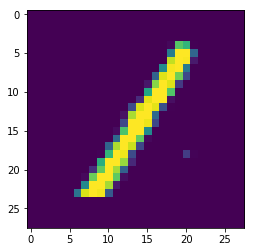

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Draw one image
plt.imshow(X_data[10000].reshape(28, 28))

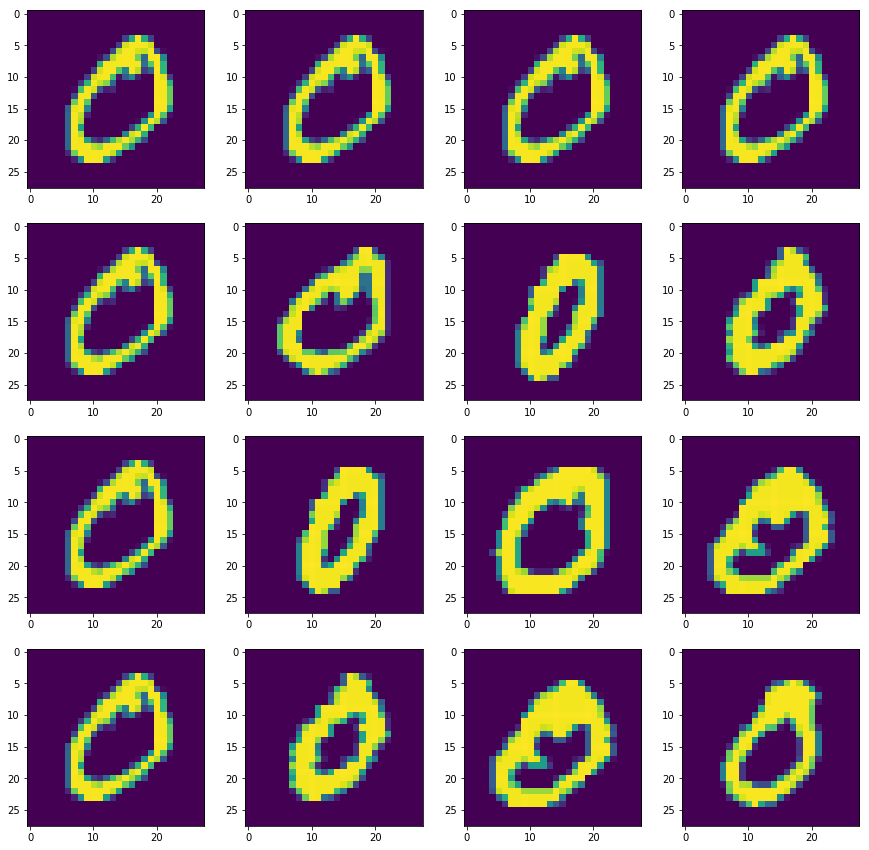

In [5]:
nb_imgs = 4

fig, axes = plt.subplots(nb_imgs, nb_imgs, figsize=(15, 15))

# Fill images
for i in range(nb_imgs):
    for j in range(nb_imgs):
        axes[i][j].imshow(X_data[i * j].reshape(28, 28))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [7]:
set(y_test)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [8]:
y_train_5 = (y_train == 5)
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [9]:
# Binary classification

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=10, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
y_pred = sgd_clf.predict(X_test)

In [11]:
# Cross validation

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [12]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

array([ 0.83996787,  0.86047134,  0.85668363,  0.85891597,  0.86897106])

In [14]:
# Performance meaure with confusion maxtrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[50052,   921],
       [ 1279,  3748]])

In [19]:
precision_not_5 = 50052 / (50052 + 1279)
precision_5 = 3748 / (3748 + 921)
print(precision_5  , '-' , precision_not_5)

0.8027414863996574 - 0.9750832830063704


In [20]:
# Recall
recall_5 = 3748 / (3748 + 1279)
recall_not_5 = 50052 / (50052 + 921)
print(recall_5  , '-' , recall_not_5)

0.7455739009349512 - 0.9819316108528044


In [23]:
# F1-score
def f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

# F1-score not 5
print(f1_score(precision_not_5, recall_not_5))
# F1_score 5
print(f1_score(precision_5, recall_5))

0.9784954644979669
0.7731023102310232


In [17]:
# Print classification report
from sklearn.metrics import classification_report

target_names = ['Not 5', 'Is 5']
print(classification_report(y_train_5, y_train_pred, target_names=target_names))

             precision    recall  f1-score   support

      Not 5       0.98      0.98      0.98     50973
       Is 5       0.80      0.75      0.77      5027

avg / total       0.96      0.96      0.96     56000

